In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


C:\Users\user\anaconda4\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import  optimizers
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras import losses


In [51]:
import h5py

In [52]:
Df=h5py.File("C://users/user/downloads/Autonomous_Vehicles_SVHN_single_grey1.h5","r")

In [53]:
Df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [54]:
train_x = Df['X_train'][:]
train_y = Df['y_train'][:]

test_x =Df['X_test'][:]
test_y = Df['y_test'][:]

val_x = Df['X_val'][:]
val_y = Df['y_val'][:]

#### Data Preprocessing

In [55]:
print('X_train:', train_x.shape)
print('y_train:', train_y.shape)
print('X_test:',test_x.shape)
print('y_test:',test_y.shape)
print('X_val:',val_x.shape)
print('y_val:', val_y.shape)

X_train: (42000, 32, 32)
y_train: (42000,)
X_test: (18000, 32, 32)
y_test: (18000,)
X_val: (60000, 32, 32)
y_val: (60000,)


Label is 2
Label is 6
Label is 7
Label is 4
Label is 4
Label is 0
Label is 3
Label is 0
Label is 7
Label is 3


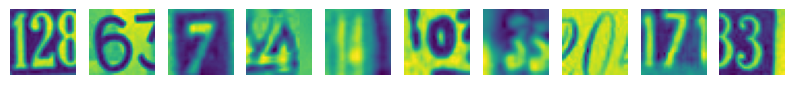

In [56]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_x[i])
    plt.axis("off")
    print("Label is", train_y[i])

Label for the image is 2


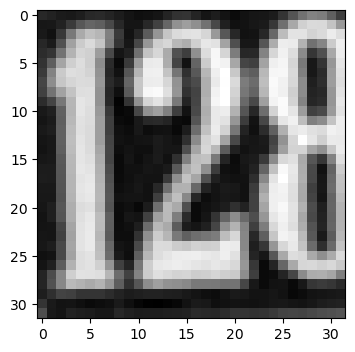

In [57]:
plt.figure(figsize=(10,4))
plt.imshow(train_x[0],cmap='gray')
print('Label for the image is', train_y[0])

In [58]:
train_x[1].shape

(32, 32)

In [59]:
trainX = train_x.reshape(train_x.shape[0], 1024)
testX= test_x.reshape(test_x.shape[0], 1024)
valX=val_x.reshape(val_x.shape[0],1024)

In [60]:
trainX.shape

(42000, 1024)

In [63]:
train_x.shape

(42000, 32, 32)

In [61]:
trainX[0:5]

array([[ 33.0704,  30.2601,  26.852 , ...,  49.6682,  50.853 ,  53.0377],
       [ 86.9591,  87.0685,  88.3735, ...,  75.2206,  76.6396,  79.2865],
       [123.125 , 125.8581, 122.0757, ...,  93.9349, 104.7875, 113.8252],
       [147.6196, 139.6204, 142.6201, ..., 157.1194, 157.1795, 157.1795],
       [153.989 , 155.1783, 157.4276, ...,  45.693 ,  48.6172,  58.1494]],
      dtype=float32)

In [64]:
print(trainX.min())
print(trainX.max())

0.0
254.9745


In [65]:
#converting it into 0 to 1 format
train_X=trainX/255
test_X=testX/255
val_X=valX/255

In [66]:
train_X.shape

(42000, 1024)

In [67]:
train_X[0:3]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334]], dtype=float32)

In [68]:
print('Min value:', train_X.min())
print('Max value:', train_X.max())
# pixels are normalized

Min value: 0.0
Max value: 0.9999


In [69]:
#Number of classes
len(np.unique(train_y))

10

In [70]:
train_y[0:10]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [71]:
num=10
trainY= to_categorical(train_y,num)
testY=to_categorical(test_y,num)
valY=to_categorical(val_y,num)

The test and train data values are transformed and normalized

#### Model training

In [72]:
Model=Sequential()

In [78]:
#image_size=32*32

Model.add(Dense(256,activation="relu",kernel_initializer="he_uniform",input_shape=(1024,)))
Model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
Model.add(Dropout(0.3))
Model.add(Dense(64,activation="relu"))
Model.add(Dense(num,activation="softmax"))

In [79]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 304202 (1.16 MB)
Trainable params: 304202 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
adam=optimizers.Adam(learning_rate=0.01)
Model.compile(optimizer="adam",loss=losses.categorical_crossentropy,metrics=["accuracy"])

In [83]:
classifier2=Model.fit(train_X,trainY,epochs=20, validation_data=(val_X,valY), batch_size=500, verbose=1)

Epoch 1/20
84/84 [==============================] - 3s 38ms/step - loss: 0.9468 - accuracy: 0.7059 - val_loss: 0.8647 - val_accuracy: 0.7364
Epoch 2/20
84/84 [==============================] - 3s 32ms/step - loss: 0.9372 - accuracy: 0.7123 - val_loss: 0.8198 - val_accuracy: 0.7519
Epoch 3/20
84/84 [==============================] - 3s 36ms/step - loss: 0.9070 - accuracy: 0.7195 - val_loss: 0.8003 - val_accuracy: 0.7536
Epoch 4/20
84/84 [==============================] - 2s 30ms/step - loss: 0.8997 - accuracy: 0.7205 - val_loss: 0.7754 - val_accuracy: 0.7620
Epoch 5/20
84/84 [==============================] - 3s 33ms/step - loss: 0.8664 - accuracy: 0.7321 - val_loss: 0.7430 - val_accuracy: 0.7742
Epoch 6/20
84/84 [==============================] - 3s 39ms/step - loss: 0.8531 - accuracy: 0.7367 - val_loss: 0.7532 - val_accuracy: 0.7695
Epoch 7/20
84/84 [==============================] - 3s 35ms/step - loss: 0.8447 - accuracy: 0.7365 - val_loss: 0.7213 - val_accuracy: 0.7804
Epoch 8/20
84

In [84]:
result2= Model.evaluate(test_X, testY)
print(result2)

563/563 [==============================] - 12s 4ms/step - loss: 0.6797 - accuracy: 0.7948
[0.6796869039535522, 0.7947777509689331]


In [85]:
result3= Model.evaluate(val_X, valY)
print(result3)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.6183 - accuracy: 0.8106
[0.618277907371521, 0.8106499910354614]


As we can see the model is performing well for both test and validation data there is only minor difference in loss and accuracy

In [86]:
y_pred=Model.predict(test_X)

563/563 [==============================] - 6s 4ms/step


In [87]:
Y_pred=[]
for i in y_pred:
    Y_pred.append(np.argmax(i))

In [91]:
print(classification_report(test_y,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1814
           1       0.81      0.82      0.81      1828
           2       0.84      0.80      0.82      1803
           3       0.71      0.79      0.75      1719
           4       0.87      0.82      0.85      1812
           5       0.79      0.75      0.77      1768
           6       0.84      0.75      0.79      1832
           7       0.78      0.87      0.82      1808
           8       0.79      0.73      0.76      1812
           9       0.78      0.76      0.77      1804

    accuracy                           0.79     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.80      0.79      0.79     18000



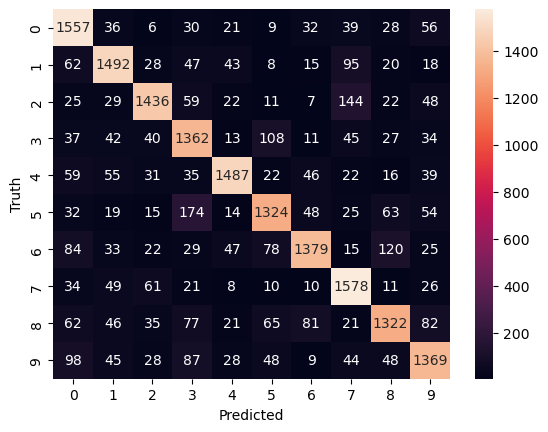

In [92]:
cm=confusion_matrix(test_y,Y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

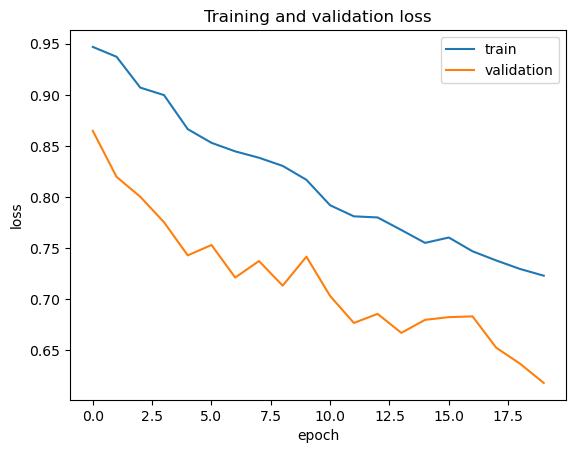

In [95]:
hist3=pd.DataFrame(classifier2.history)
hist3['epoch']=classifier2.epoch
plt.title("Training and validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train","validation"),loc=0)

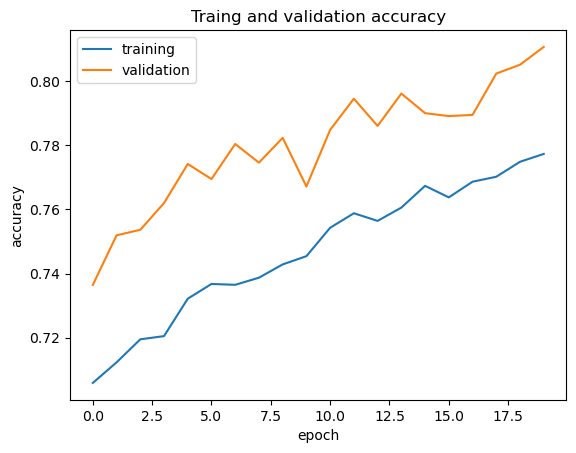

In [97]:
#loss, accuracy  = d.evaluate(xtest, Ytest, verbose=False)
plt.plot(classifier2.history['accuracy'])
plt.plot(classifier2.history['val_accuracy'])
plt.title('Traing and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

On analysing the above classifier model,
* we see that the loss is 0.6 and accuracy is 81% for validation data and it slightly lower for test data
* on classification report of test data it is observed that the accuracy is 79% the precision for class 4 is higher which means the data predicts 4 correctly most number of times.
 * class 3 has low precisio values. It's not that the model is performing too good on the data, bacause while referring confusion matrix we see that the model wrongly predicts numbers several times.
 * Since the loss and accuracy is increasing with each epoch , this model certainly fits the data and makes prediction at a good rate.